# Sequential Sampling

This section provides implementation for the concepts covered in the class for sequential sampling, refer lecture notes for more details. Following methods are covered:

1. Exploitation
2. Exploration
3. Lower Confidence Bound
4. Probability of Improvement
5. Expected Improvement

As discussed in lecture, these methods are used to find global minimum of an expensive to evaluate blackbox function. To do this, a surrogate model is built with a few initial points and then model is updated with new points using one of the above methods. Forrester function (given below) is used as a test function to demonstrate the working of these methods.

$$
    \begin{gathered}
        f(x) = (6x-2)^2 \sin(12x-4) \\
        0 \leq x \leq 1
    \end{gathered}
$$

The global minimum of the function is at $x^* = 0.78$ and $f(x^*) = -6.02$. For demonstration, gaussian process models will be employed and 3 equally spaced points within the domain are used as initial samples. Below block of code plots the initial points, true function, and global minimum.

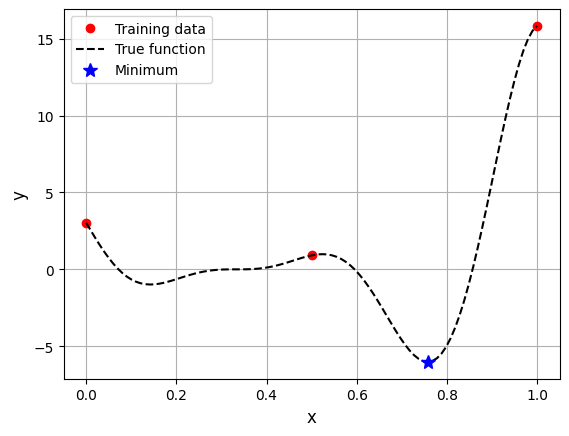

In [7]:
import numpy as np
import matplotlib.pyplot as plt

forrester = lambda x: (6*x-2)**2*np.sin(12*x-4)

xtrain = np.linspace(0, 1, 3)
ytrain = forrester(xtrain)

xplot = np.linspace(0, 1, 100)
yplot = forrester(xplot)

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain, ytrain, "ro", label="Training data")
ax.plot(xplot, yplot, "k--", label="True function")
ax.plot(xplot[np.argmin(yplot)], np.min(yplot), "b*", label="Minimum", markersize=10)
ax.set_xlabel("x", fontsize=fs)
ax.set_ylabel("y", fontsize=fs)
ax.grid()
ax.legend(fontsize=fs-2)

As can be seen from above plot, the function has multiple local minima and the goal is to find the global minimum using surrogate model and sequential sampling.